In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#Importing dataset
data = pd.read_csv('noodles.csv')

In [3]:
#Inspecting top 5 rows
data.head()

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,Asia,1425887337
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,Asia,275501339
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,Asia,1417173173
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,Asia,123951692
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,Asia,115559009


In [4]:
#Checking info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Region     53 non-null     object 
 1   2018               52 non-null     float64
 2   2019               52 non-null     float64
 3   2020               52 non-null     float64
 4   2021               53 non-null     int64  
 5   2022               52 non-null     float64
 6   Rank               53 non-null     int64  
 7   CCA3               53 non-null     object 
 8   Country/Territory  53 non-null     object 
 9   Capital            53 non-null     object 
 10  Continent          53 non-null     object 
 11  2022 Population    53 non-null     int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 5.1+ KB


We have 
- data for noodles consumption for 53 countries in Millions of US dollars from 2018 upto 2022
- Population of country/region in 2022
- Rank of country based on the population in 2022

Data is clean without any null values

In [5]:
#Statistical Summary of the Consumption data

data[['2018','2019','2020','2021','2022']].describe()

,2018,2019,2020,2021,2022
count,52.000000,52.000000,52.000000,53.000000,52.000000
mean,1782.692308,1833.461538,1989.423077,1952.075472,2046.730769
std,5849.555410,6009.552815,6659.770771,6321.729120,6554.724900
min,10.000000,10.000000,0.000000,10.000000,10.000000
25%,50.000000,57.500000,67.500000,60.000000,67.500000
50%,190.000000,230.000000,240.000000,270.000000,260.000000
75%,902.500000,915.000000,942.500000,900.000000,1037.500000
max,40250.000000,41450.000000,46360.000000,43990.000000,45070.000000


We can see that the mean Noodles consumption is increasing from 2018 to 2022

<font color=red>**Possible insights:**</font>

1. Consumption Trends:
    - How has noodle consumption evolved from 2018 to 2022 for each country?
    - Are there countries where noodle consumption has consistently increased or decreased over this period?
2. Regional Patterns:
    - Do certain continents or regions show higher average noodle consumption levels than others?
    - Are there notable differences in noodle consumption within the same continent?
3. Top Consumers:
    - Which countries are the top consumers of noodles in 2022?
    - Have these top consumers remained consistent over the years?
4. Population Influence:
    - Is there a correlation between a country's population rank and its noodle consumption?
    - Do countries with larger populations tend to consume more noodles?
5. Yearly Growth:
    - What is the year-over-year growth rate in noodle consumption for different countries?
    - Are there countries experiencing rapid growth or decline in consumption?
6. Seasonal Variations:
    - Are there seasonal patterns in noodle consumption within specific countries?
    - Do consumption levels change during particular months or seasons?
7. Outliers and Anomalies:
    - Which countries exhibit unusual spikes or drops in noodle consumption compared to the overall trend?
    - What factors might explain these anomalies?
8. Correlations with Factors:
    - Is there a relationship between noodle consumption and factors like GDP per capita or urbanization rate?
    - Do certain economic or demographic factors influence consumption?
9. Future Forecasts:
    - Can we predict future noodle consumption for different countries based on historical data?
    - What factors are most influential in making these predictions?
10. Comparative Analysis:
    - How does noodle consumption vary between continents or groups of countries with different population ranks?
    - Are there significant differences in consumption patterns?
11. Market Potential:
    - Which countries with high population ranks have relatively low noodle consumption?
    - Could these countries represent untapped market opportunities?
12. Saturation Point:
    - Have some countries reached a point of saturation in noodle consumption, where further growth is unlikely?
    - Which countries are still experiencing rapid growth potential?
13. Consumer Preferences:
    - What cultural or economic factors influence the preference for noodles in different countries?
    - Are there insights into taste preferences or affordability that affect consumption?
14. Market Share Analysis:
    - What are the market shares of different noodle brands or types within each country?
    - How competitive is the noodle market in various regions?
15. Strategic Planning:
    - How can historical data and trends inform production, marketing, and distribution strategies for noodle products in different countries?
    - What strategies might be effective in expanding market share?

We can see that the cosumption is following same pattern every year across the countries with China, Indonesian and India as top 3 Consumers of Instant Noodles

## Feature Engineering - Year over Year (YoY)

In [6]:
# YOY changes

data['YoY_2019'] = round(((data['2019']-data['2018'])/(data['2018']))*100,2)
data['YoY_2020'] = round(((data['2020']-data['2019'])/(data['2019']))*100,2)
data['YoY_2021'] = round(((data['2021']-data['2020'])/(data['2020']))*100,2)
data['YoY_2022'] = round(((data['2022']-data['2021'])/(data['2021']))*100,2)

In [7]:
data.head()

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,YoY_2019,YoY_2020,YoY_2021,YoY_2022
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,Asia,1425887337,2.98,11.85,-5.11,2.46
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,Asia,275501339,-0.16,0.96,4.98,7.46
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,Asia,1417173173,11.06,0.00,12.33,0.26
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,Asia,123951692,-2.60,6.04,-2.01,2.22
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,Asia,115559009,-3.27,16.10,-0.67,-3.38


## Top & Least Consumers across the years

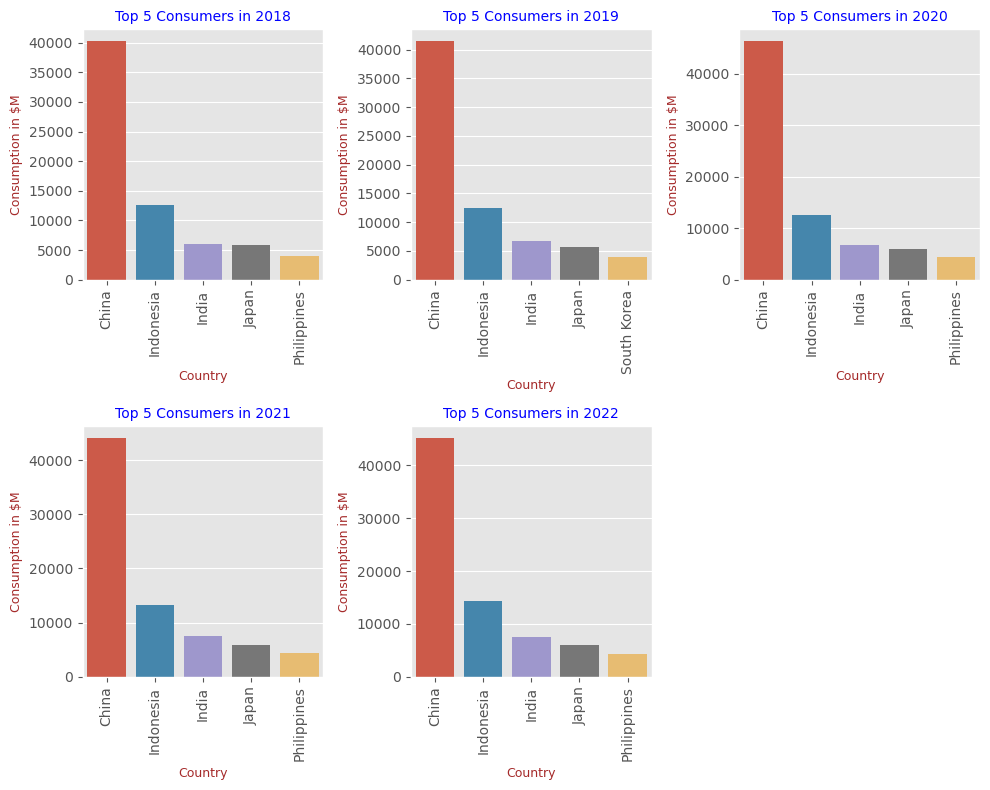

In [80]:
#Top 5 consumers across the years

years = ['2018','2019','2020','2021','2022']

plt.figure(figsize=(10,8))
for i,yr in enumerate(years):
    df = data.sort_values(yr,ascending=False)[['Country/Region',yr]][:5]
    plt.subplot(2,3,i+1)
    sns.barplot(data=df,x='Country/Region',y=yr)
    plt.title('Top 5 Consumers in {}'.format(yr),fontdict={'color':'blue','fontsize':10})
    plt.ylabel('Consumption in $M',fontdict={'fontsize':9,'color':'brown',})
    plt.xlabel('Country',fontdict={'fontsize':9,'color':'brown'})
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

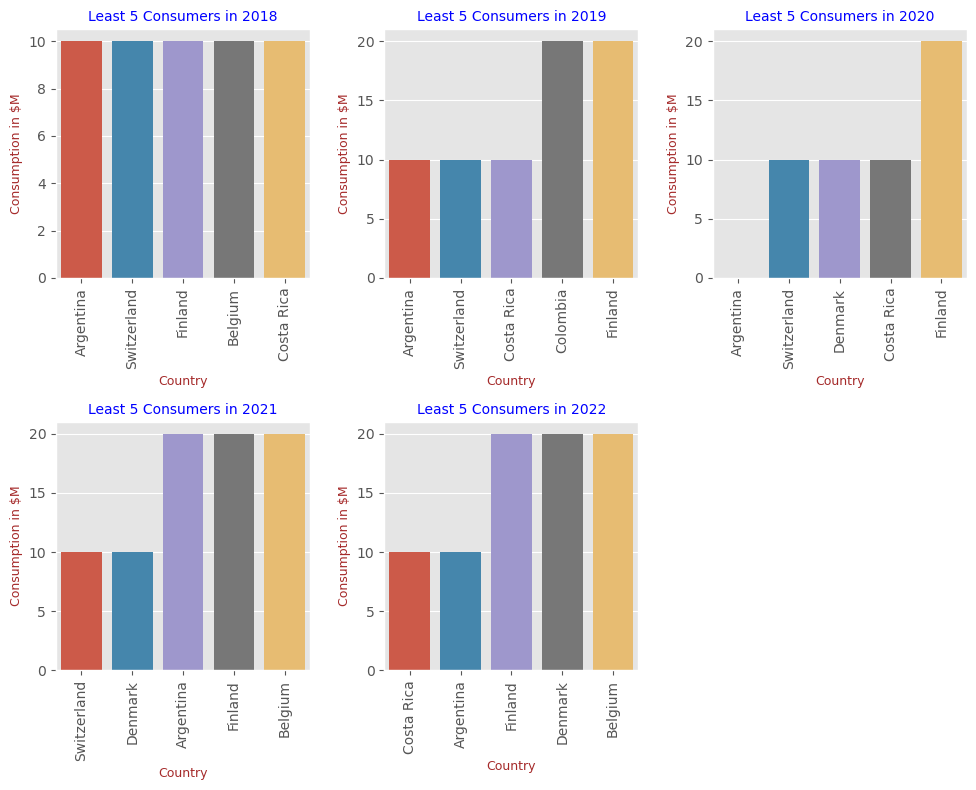

In [82]:
#Least 5 consumers across the years

years = ['2018','2019','2020','2021','2022']

plt.figure(figsize=(10,8))
for i,yr in enumerate(years):
    df = data.sort_values(yr,ascending=True)[['Country/Region',yr]][:5]
    plt.subplot(2,3,i+1)
    sns.barplot(data=df,x='Country/Region',y=yr)
    plt.title('Least 5 Consumers in {}'.format(yr),fontdict={'color':'blue','fontsize':10})
    plt.ylabel('Consumption in $M',fontdict={'fontsize':9,'color':'brown',})
    plt.xlabel('Country',fontdict={'fontsize':9,'color':'brown'})
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see that China, Indonesia, India, Japan and Philippines continue to be the top 5 consumers of Noodles from 2018 to 2019.
While Argentina, Costa Rica, Switzerland, Denmark are the leat consumers across the years

## Increasing Consumption Growth Rate

We saw the countries which are consuming more noodles in the above. Now let us see the countries which are having continous growth rate from 2018 to 2022

In [91]:
data[(data.YoY_2022 > data.YoY_2021)&(data.YoY_2021 > data.YoY_2020)&(data.YoY_2020 > data.YoY_2019)]

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,YoY_2019,YoY_2020,YoY_2021,YoY_2022
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,Asia,275501339,-0.16,0.96,4.98,7.46


We can see that Indonesia, which is occupying 4th rank on the basis of its population in 2022, is the only country which is having a continous growth rate from 2018 to 2022. Now let us see the countries with decreasing consumption growth rate

## Decaying Consumption Growth Rate

In [92]:
data[(data.YoY_2022 < data.YoY_2021)&(data.YoY_2021 < data.YoY_2020)&(data.YoY_2020 < data.YoY_2019)]

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,YoY_2019,YoY_2020,YoY_2021,YoY_2022
25,Guatemala,230.0,250.0,260.0,270,280.0,68,GTM,Guatemala,Guatemala City,North America,17843908,8.7,4.0,3.85,3.7


We can see that Guatemala is the only country where the growth rate is decreasing over the years

In [103]:
data.head()

,Country/Region,2018,2019,2020,2021,2022,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,YoY_2019,YoY_2020,YoY_2021,YoY_2022
0,China,40250.0,41450.0,46360.0,43990,45070.0,1,CHN,China,Beijing,Asia,1425887337,2.98,11.85,-5.11,2.46
1,Indonesia,12540.0,12520.0,12640.0,13270,14260.0,4,IDN,Indonesia,Jakarta,Asia,275501339,-0.16,0.96,4.98,7.46
2,India,6060.0,6730.0,6730.0,7560,7580.0,2,IND,India,New Delhi,Asia,1417173173,11.06,0.00,12.33,0.26
3,Japan,5780.0,5630.0,5970.0,5850,5980.0,11,JPN,Japan,Tokyo,Asia,123951692,-2.60,6.04,-2.01,2.22
4,Philippines,3980.0,3850.0,4470.0,4440,4290.0,13,PHL,Philippines,Manila,Asia,115559009,-3.27,16.10,-0.67,-3.38


## Consumption on a continental level

In [121]:
df = data.set_index(['Continent','Country/Region']).sort_values('Continent')

In [127]:
df = df.groupby(['Continent']).sum(numeric_only=True)

In [144]:
df

,2018,2019,2020,2021,2022,Rank,2022 Population,YoY_2019,YoY_2020,YoY_2021,YoY_2022
Continent,,,,,,,,,,,
Africa,2430.0,2620.0,3360.0,3660,4000.0,83,566832611,60.45,161.45,71.26,76.25
Asia,82410.0,84610.0,91520.0,90560,93190.0,702,4340057080,185.87,235.55,152.43,71.37
Europe,3210.0,3340.0,3500.0,3740,3570.0,1041,566480201,276.50,64.19,79.76,246.52
North America,1550.0,1620.0,1620.0,1850,2000.0,241,188983189,13.16,3.15,126.35,-35.27
Oceania,490.0,510.0,530.0,540,550.0,178,31362701,14.94,4.76,2.27,11.11
South America,2610.0,2640.0,2920.0,3110,3120.0,177,366351161,1.26,-120.93,inf,119.30


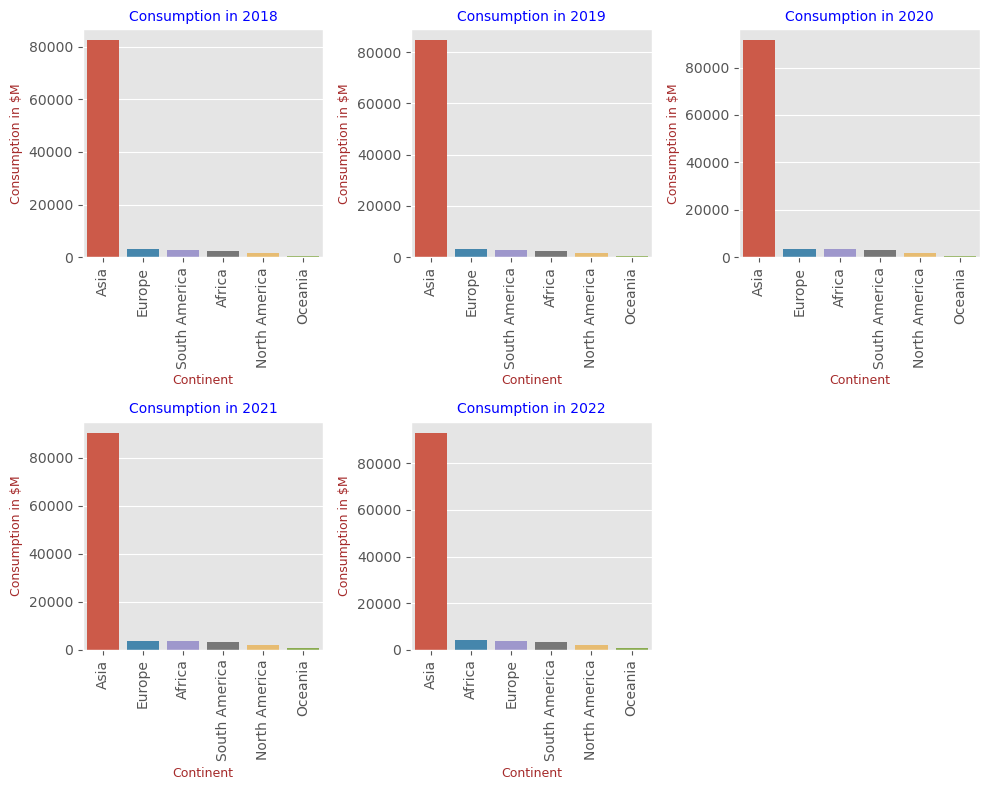

In [148]:
plt.figure(figsize=(10,8))
for i,yr in enumerate(years):
    df2 = df.sort_values(yr,ascending=False)[yr].reset_index()
    plt.subplot(2,3,i+1)
    sns.barplot(data=df2,x='Continent',y=yr)
    plt.title('Consumption in {}'.format(yr),fontdict={'color':'blue','fontsize':10})
    plt.ylabel('Consumption in $M',fontdict={'fontsize':9,'color':'brown',})
    plt.xlabel('Continent',fontdict={'fontsize':9,'color':'brown'})
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Most of the Noodle Consumption is in Asia continent